# Exploring the Cityscapes dataset

In this Jupyter Notebook we explore the Cityscapes dataset making use of the dataloader [cityscapesDataset](./datasets/cityscapes.py).

In [1]:
!pip install cityscapesscripts


## Imports
We make use of the [cityscapesscripts package](https://github.com/mcordts/cityscapesScripts) to download the files. It is necessary to provide a *username* and *password* to download the dataset. 

In [2]:
import os
import zipfile
from os.path import join as pjoin
from datasets.cityscapes import cityscapesDataset
from cityscapesscripts.download import downloader 
from torchvision import transforms

In [3]:
local_path = "./Cityscapes"
pckgs_names = ["gtFine_trainvaltest.zip","leftImg8bit_trainvaltest.zip"]
dir_names = ["gtFine", "leftImg8bit"]

### Download the dataset

In order to obtain them, go to the [Cityscapes dataset webpage](https://www.cityscapes-dataset.com/register/) and register. Once you have register, execute the next cell to log in.

In [4]:
session = downloader.login()

In [5]:
# Download zip files
for pckg_name in pckgs_names:
    if not os.path.isfile(pckg_name):
        session = downloader.login()
        downloader.download_packages(session=session, package_names=[pckg_name], destination_path="./")
        
# Extract zip files 
for dir_name in dir_names:
    if not os.path.isdir(pjoin(local_path, dir_name)):
        with zipfile.ZipFile(pckg_name, "r") as zip_file:
            zip_file.extractall(local_path)

### Load the dataset

In [6]:
training_data = cityscapesDataset(local_path, split="train")
validation_data = cityscapesDataset(local_path, split="val")
test_data = cityscapesDataset(local_path, split="test")

Annotations files processed
Annotations files processed
Annotations files processed


### Explore the dataset

In [7]:
dataset_sizes = {
    'train': len(training_data),
    'val': len(validation_data),
    'test': len(test_data),
    'total': len(training_data) + len(validation_data) + len(test_data)
}

dataset_sizes

{'train': 2975, 'val': 500, 'test': 1525, 'total': 5000}

In [8]:
img, label = training_data[2]

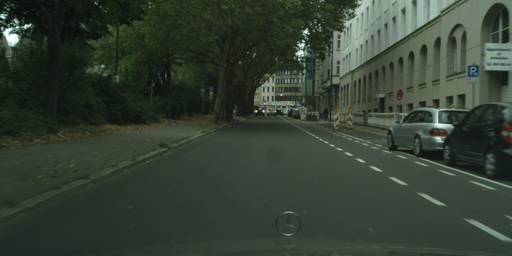

In [9]:
img = transforms.ToPILImage()(img).convert("RGB")
img

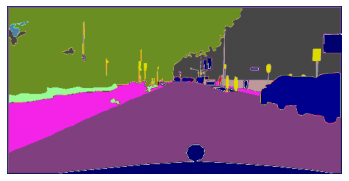

In [10]:
training_data.decode_segmap(label.numpy(), plot=True)